In [5]:
# sorting algorithms
from sort_me import sort
# function to measure time
from time import time
# graph plotting library
from matplotlib import pyplot as plt
# random number generation
from random import choices
# CSV files handling
import csv
# Data analysis
import pandas as pd
# CSV files handling
import csv
# Path handling
from os import path

In [6]:
import sys
sys.setrecursionlimit(1000000)

In [7]:
LIST_SIZES = [1e1, 1e2, 1e3, 1e4]

In [8]:
with open('sorting_data.csv', 'w') as csv_file:
    field_names = ['algorithm', 'entries', 'time']
    csv_writer = csv.DictWriter(csv_file, fieldnames=field_names)
    csv_writer.writeheader()

    for size in LIST_SIZES:
        random_list = choices(range(1000),  k=int(size))

        time_bubble = time()
        _ = sort.bubble(random_list)
        time_bubble = time() - time_bubble
        
        time_merge = time()
        _ = sort.merge(random_list)
        time_merge = time() - time_merge

        time_quick = time()
        _ = sort.quick(random_list)
        time_quick = time() - time_quick

        csv_writer.writerow({'algorithm': 'bubble', 'entries': int(size), 'time': time_bubble})
        csv_writer.writerow({'algorithm': 'merge', 'entries': int(size), 'time': time_merge})
        csv_writer.writerow({'algorithm': 'quick', 'entries': int(size), 'time': time_quick})

In [9]:
data = pd.read_csv(path.join(path.curdir, "sorting_data.csv"))

bubble = data.loc[data['algorithm'] == 'bubble', ['entries', 'time']].set_index('entries').rename(columns={'time':'Bubble sort'})
merge = data.loc[data['algorithm'] == 'merge', ['entries', 'time']].set_index('entries').rename(columns={'time':'Merge sort'})
quick = data.loc[data['algorithm'] == 'quick', ['entries', 'time']].set_index('entries').rename(columns={'time':'Quick sort'})

data = pd.concat([bubble, merge, quick], axis=1)

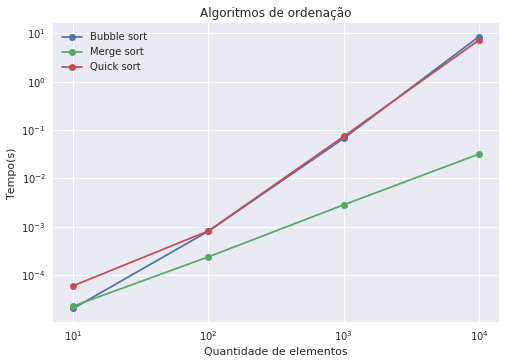

In [11]:
plt.style.use('seaborn')
data.plot(
        style="o-",
        loglog=True,
        x_compat=True,
        xlabel="Quantidade de elementos",
        ylabel="Tempo(s)",
        title="Algoritmos de ordenação")